## Week 3

**In the last couple of weeks you looked first at Tokenizing words to get numeric values from them, and then using Embeddings to group words of similar meaning depending on how they were labelled. This gave you a good, but rough, sentiment analysis -- words such as 'fun' and 'entertaining' might show up in a positive movie review, and 'boring' and 'dull' might show up in a negative one. But sentiment can also be determined by the sequence in which words appear. For example, you could have 'not fun', which of course is the opposite of 'fun'. This week you'll start digging into a variety of model formats that are used in training models to understand context in sequence!**


---

1.  **LSTM**

    * Long Short-Term Memory layer - Hochreiter 1997.

    * [Understanding LSTM Networks](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) 

    * For more information on how to use LSTM, you can visit [here](https://keras.io/api/layers/recurrent_layers/lstm/).

2. **GRU**

    * Gated Recurrent Unit - Cho et al. 2014.

    * [Understanding GRU Networks](https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be) 

    * For more information on how to use GRU, you can visit [here](https://keras.io/api/layers/recurrent_layers/gru/).


3. **Conve1D**

    * 1D convolution layer (e.g. temporal convolution).

    * This layer creates a convolution kernel that is convolved with the layer input over a single spatial (or temporal) dimension to produce a tensor of outputs. If use_bias is True, a bias vector is created and added to the outputs. Finally, if activation is not None, it is applied to the outputs as well.

    * When using this layer as the first layer in a model, provide an input_shape argument (tuple of integers or None, e.g. (10, 128) for sequences of 10 vectors of 128-dimensional vectors, or (None, 128) for variable-length sequences of 128-dimensional vectors.

    * For more information on how to use Conve1D, you can visit [here](https://keras.io/api/layers/convolution_layers/convolution1d/).

4. **tf.keras.layers.Bidirectional**

    * You can go to [here](https://blog.paperspace.com/bidirectional-rnn-keras/) to understand how this layer works.

    * You can also go [here](https://keras.io/api/layers/recurrent_layers/bidirectional/) for how to use this layer in Tensorflow.

### example_1 

IMDB Subwords 8K with Multi Layer LSTM

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)

In [ ]:
train_dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files>

In [ ]:
tokenizer = info.features['text'].encoder
tokenizer

<SubwordTextEncoder vocab_size=8185>

In [ ]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE,  tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 107s 250ms/step - loss: 0.5988 - accuracy: 0.6689 - val_loss: 0.5133 - val_accuracy: 0.7749
Epoch 2/10
391/391 [==============================] - 99s 251ms/step - loss: 0.4623 - accuracy: 0.7895 - val_loss: 0.6796 - val_accuracy: 0.6749
Epoch 3/10
391/391 [==============================] - 99s 251ms/step - loss: 0.5471 - accuracy: 0.7288 - val_loss: 0.6805 - val_accuracy: 0.6228
Epoch 4/10
391/391 [==============================] - 100s 254ms/step - loss: 0.4369 - accuracy: 0.8077 - val_loss: 0.4556 - val_accuracy: 0.8042
Epoch 5/10
391/391 [==============================] - 100s 253ms/step - loss: 0.3699 - accuracy: 0.8491 - val_loss: 0.5037 - val_accuracy: 0.7780
Epoch 6/10
391/391 [==============================] - 100s 253ms/step - loss: 0.3279 - accuracy: 0.8693 - val_loss: 0.5977 - val_accuracy: 0.7080
Epoch 7/10
391/391 [==============================] - 100s 253ms/step - loss: 0.3047 - accuracy: 0.8758 - val_loss: 0.4455 - v

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

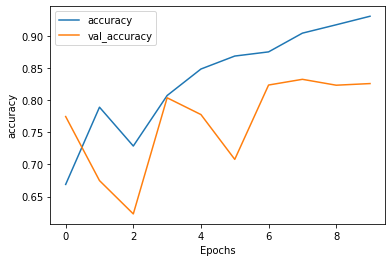

In [ ]:
plot_graphs(history, 'accuracy')

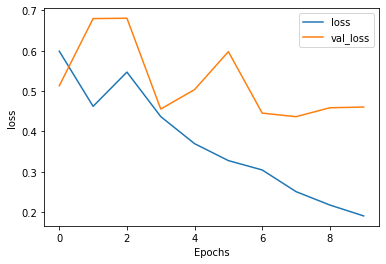

In [ ]:
plot_graphs(history, 'loss')

### example_2 

IMDB Subwords 8K with Single Layer LSTM

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [ ]:
tokenizer = info.features['text'].encoder

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 57s 138ms/step - loss: 0.6044 - accuracy: 0.6546 - val_loss: 0.6140 - val_accuracy: 0.6604
Epoch 2/10
391/391 [==============================] - 54s 137ms/step - loss: 0.4562 - accuracy: 0.7930 - val_loss: 0.4634 - val_accuracy: 0.7999
Epoch 3/10
391/391 [==============================] - 54s 137ms/step - loss: 0.3327 - accuracy: 0.8676 - val_loss: 0.4992 - val_accuracy: 0.7735
Epoch 4/10
391/391 [==============================] - 54s 138ms/step - loss: 0.2780 - accuracy: 0.8924 - val_loss: 0.3927 - val_accuracy: 0.8358
Epoch 5/10
391/391 [==============================] - 54s 137ms/step - loss: 0.2172 - accuracy: 0.9195 - val_loss: 0.4321 - val_accuracy: 0.8288
Epoch 6/10
391/391 [==============================] - 54s 137ms/step - loss: 0.2189 - accuracy: 0.9189 - val_loss: 0.6933 - val_accuracy: 0.6927
Epoch 7/10
391/391 [==============================] - 55s 140ms/step - loss: 0.2188 - accuracy: 0.9141 - val_loss: 0.5287 - val_ac

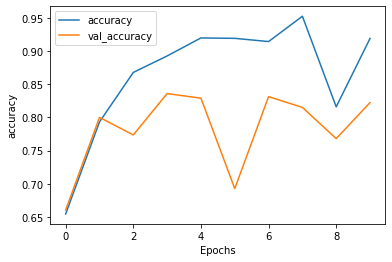

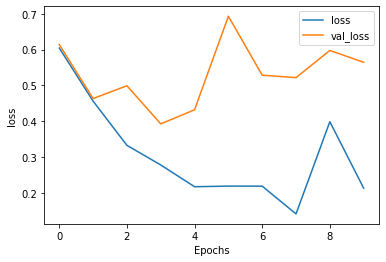

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

### example_3

IMDB Subwords 8K with Single Layer Conv1D

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [ ]:
tokenizer = info.features['text'].encoder

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d_2 ( (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 67s 101ms/step - loss: 0.4449 - accuracy: 0.7856 - val_loss: 0.3109 - val_accuracy: 0.8780
Epoch 2/10
391/391 [==============================] - 21s 52ms/step - loss: 0.2281 - accuracy: 0.9165 - val_loss: 0.3083 - val_accuracy: 0.8797
Epoch 3/10
391/391 [==============================] - 18s 43ms/step - loss: 0.1708 - accuracy: 0.9400 - val_loss: 0.3278 - val_accuracy: 0.8745
Epoch 4/10
391/391 [==============================] - 18s 43ms/step - loss: 0.1356 - accuracy: 0.9519 - val_loss: 0.3752 - val_accuracy: 0.8694
Epoch 5/10
391/391 [==============================] - 17s 41ms/step - loss: 0.1118 - accuracy: 0.9622 - val_loss: 0.4132 - val_accuracy: 0.8656
Epoch 6/10
391/391 [==============================] - 17s 41ms/step - loss: 0.0905 - accuracy: 0.9707 - val_loss: 0.4993 - val_accuracy: 0.8570
Epoch 7/10
391/391 [==============================] - 16s 40ms/step - loss: 0.0694 - accuracy: 0.9777 - val_loss: 0.6180 - val_accuracy

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

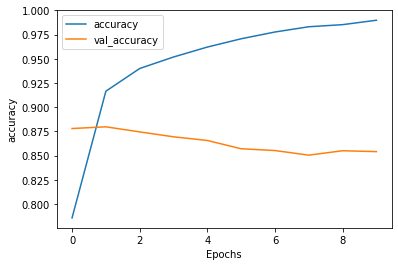

In [ ]:
plot_graphs(history, 'accuracy')

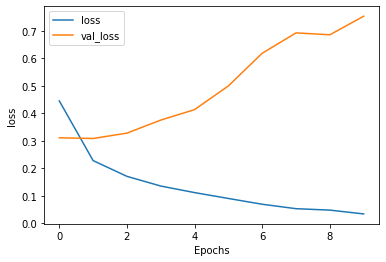

In [ ]:
plot_graphs(history, 'loss')

### example_4

comparison between **Bidirectional(tf.keras.layers.GRU(32))** and **Bidirectional(tf.keras.layers.LSTM(32))** and **Conv1D(128, 5, activation='relu')**

In [ ]:
import tensorflow as tf
print(tf.__version__)

# !pip install -q tensorflow-datasets

2.5.0


In [ ]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

In [ ]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())
  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

? ? ? ? ? ? ? b'i have been known to fall asleep during films but this is usually due to a combination of things including really tired being warm and comfortable on the <OOV> and having just eaten a lot however on this occasion i fell asleep because the film was rubbish the plot development was constant constantly slow and boring things seemed to happen but with no explanation of what was causing them or why i admit i may have missed part of the film but i watched the majority of it and everything just seemed to happen of its own <OOV> without any real concern for anything else i cant recommend this film at all '
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation of 

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                9600      
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 390       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 7         
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
782/782 [==============================] - 16s 18ms/step - loss: 0.5220 - accuracy: 0.7124 - val_loss: 0.3622 - val_accuracy: 0.8382
Epoch 2/50
782/782 [==============================] - 13s 17ms/step - loss: 0.3011 - accuracy: 0.8780 - val_loss: 0.3588 - val_accuracy: 0.8432
Epoch 3/50
782/782 [==============================] - 13s 17ms/step - loss: 0.2382 - accuracy: 0.9089 - val_loss: 0.3718 - val_accuracy: 0.8394
Epoch 4/50
782/782 [==============================] - 13s 17ms/step - loss: 0.1818 - accuracy: 0.9328 - val_loss: 0.4317 - val_accuracy: 0.8340
Epoch 5/50
782/782 [==============================] - 13s 17ms/step - loss: 0.1340 - accuracy: 0.9535 - val_loss: 0.4729 - val_accuracy: 0.8203
Epoch 6/50
782/782 [==============================] - 13s 17ms/step - loss: 0.0962 - accuracy: 0.9668 - val_loss: 0.5584 - val_accuracy: 0.8274
Epoch 7/50
782/782 [==============================] - 13s 17ms/step - loss: 0.0617 - accuracy: 0.9794 - val_loss: 0.6904 - val_accuracy:

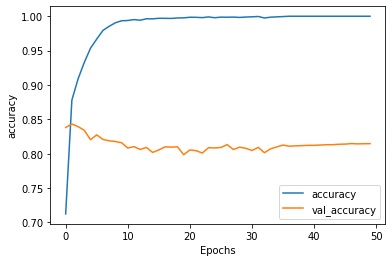

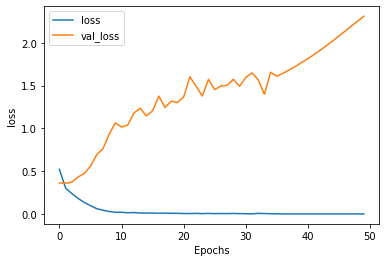

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
# Model Definition with LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 390       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 7         
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
782/782 [==============================] - 16s 18ms/step - loss: 0.5292 - accuracy: 0.7290 - val_loss: 0.4192 - val_accuracy: 0.8237
Epoch 2/50
782/782 [==============================] - 13s 17ms/step - loss: 0.3649 - accuracy: 0.8488 - val_loss: 0.3682 - val_accuracy: 0.8354
Epoch 3/50
782/782 [==============================] - 13s 17ms/step - loss: 0.2876 - accuracy: 0.8906 - val_loss: 0.3774 - val_accuracy: 0.8442
Epoch 4/50
782/782 [==============================] - 14s 17ms/step - loss: 0.2443 - accuracy: 0.9110 - val_loss: 0.3743 - val_accuracy: 0.8362
Epoch 5/50
782/782 [==============================] - 14s 17ms/step - loss: 0.2156 - accuracy: 0.9236 - val_loss: 0.3981 - val_accuracy: 0.8286
Epoch 6/50
782/782 [==============================] - 13s 17ms/step - loss: 0.1851 - accuracy: 0.9357 - val_loss: 0.4342 - val_accuracy: 0.8300
Epoch 7/50
782/782 [==============================] - 14s 18ms/step - loss: 0.1524 - accuracy: 0.9502 - val_loss: 0.4894 - val_accuracy:

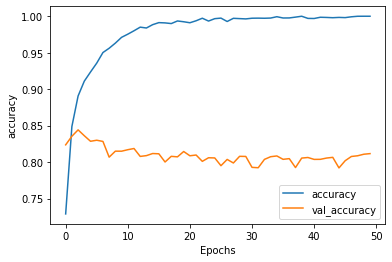

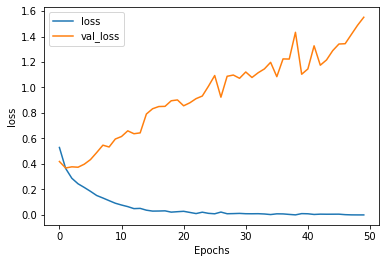

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
# Model Definition with Conv1D
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 116, 128)          10368     
_________________________________________________________________
global_average_pooling1d_3 ( (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 6)                 774       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 7         
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
782/782 [==============================] - 6s 7ms/step - loss: 0.5501 - accuracy: 0.7484 - val_loss: 0.4458 - val_accuracy: 0.8451
Epoch 2/50
782/782 [==============================] - 5s 7ms/step - loss: 0.3722 - accuracy: 0.8735 - val_loss: 0.4014 - val_accuracy: 0.8451
Epoch 3/50
782/782 [==============================] - 5s 7ms/step - loss: 0.2915 - accuracy: 0.9050 - val_loss: 0.4006 - val_accuracy: 0.8374
Epoch 4/50
782/782 [==============================] - 5s 7ms/step - loss: 0.2410 - accuracy: 0.9232 - val_loss: 0.4245 - val_accuracy: 0.8347
Epoch 5/50
782/782 [==============================] - 5s 7ms/step - loss: 0.2006 - accuracy: 0.9393 - val_loss: 0.4915 - val_accuracy: 0.8304
Epoch 6/50
782/782 [==============================] - 5s 7ms/step - loss: 0.1727 - accuracy: 0.9498 - val_loss: 0.5293 - val_accuracy: 0.8238
Epoch 7/50
782/782 [==============================] - 5s 7ms/step - loss: 0.1512 - accuracy: 0.9566 - val_loss: 0.6382 - val_accuracy: 0.8262
Epoch 

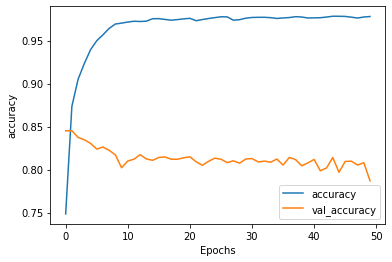

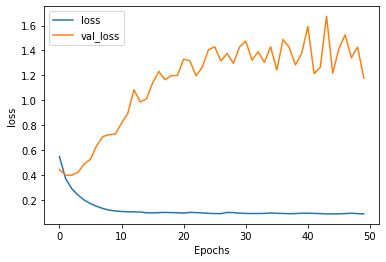

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')